In [99]:
import pandas as pd
from sklearn import datasets

In [100]:
iris = datasets.load_iris()

In [101]:
df = pd.DataFrame(iris.data)
df.columns = ['sl', 'sw', 'pl', 'pw']
df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
# Function to find label for a value
# if MIN_Value <=val < (m + Mean_Value) / 2 then it is assigned label a
# if (m + Mean_Value) <=val < Mean_Value then it is assigned label b
# if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then it is assigned label c
# if (Mean_Value + MAX_Value)/2 <=val <= MAX_Value  then it is assigned label d

def label(val, *boundaries):
    if val < boundaries[0]:
        return 'a'
    elif val < boundaries[1]:
        return 'b'
    elif val < boundaries[2]:
        return 'c'
    else:
        return 'd'
    
# Function to convert continuous data into labelled data
# Labels -> a, b, c and d
def to_label(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(label, args = (first, second, third))

In [103]:
# Convert all columns to labelled data
df['sl_labelled'] = to_label(df, 'sl')
df['sw_labelled'] = to_label(df, 'sw')
df['pl_labelled'] = to_label(df, 'pl')
df['pw_labelled'] = to_label(df, 'pw')
df.head()

,sl,sw,pl,pw,sl_labelled,sw_labelled,pl_labelled,pw_labelled
0,5.1,3.5,1.4,0.2,b,c,a,a
1,4.9,3.0,1.4,0.2,a,b,a,a
2,4.7,3.2,1.3,0.2,a,c,a,a
3,4.6,3.1,1.5,0.2,a,c,a,a
4,5.0,3.6,1.4,0.2,a,c,a,a


In [104]:
df.drop(['pl', 'pw', 'sl', 'sw'], axis = 1, inplace = True)

In [105]:
set(df['sl_labelled'])

{'a', 'b', 'c', 'd'}

In [106]:
import math  # for log function

In [107]:
def curr_entropy(y) :
    total_ele = len(y)  # length of target
    entropy_value = 0   # taking entropy as 0 initially
    
    for i in set(y[0]) :  # iterating over each label present in Y
        count_of_class = len(y[y[0] == i])  # counting occurence of a label in Y  
        probability = count_of_class/total_ele     # finding probability
        entropy_value += probability * math.log(probability, 2)  # adding it to total entropy  
        
    entropy_value = -entropy_value
    
    return entropy_value

In [108]:
def information_gain(x, y, feature) :
    initial_entropy = entropy(y)  # calculating entropy of Y 
    total_ele = len(y)   # to get the count of number of labels present in Y data
    weighted_entropy = 0  # initiating weighted average = 0 
    
    val = set(x[feature])  # taking in account every unique label
    
    # iterating to get weighted entropies of each child and add them 
    for i in val :
        child = y[(x[feature] == i)]
        i_entropy = entropy(child)
        
        weighted_entropy += (i_entropy * len(child)) / total_ele
        
    #finding info gain
    info_gain = initial_entropy - weighted_entropy  
    return info_gain

In [109]:
# getting split info in order to calculate gain ratio 
def splitting_info(x, y, feature) :
    total_ele = len(y)
    split = 0
    val = set(x[feature]) # unique values in each feature
    
    for i in val : # taking 1 child at a time 
        child = y[x[feature] == i] # taking values of Y where feature is i (given iteration)
        split += (len(child) / total_ele) * math.log((len(child) / total_ele), 2) ## calculating weighted average here
        
    return -1 * split

In [110]:
def get_best_feature(x, y, features) :
    best_feature = ''            # initially setting best feature as ' '
    max_gain = -1                # initially max_gain = -1
    
    # iterating over all features
    for i in features :
        split_info = splitting_info(x, y, i) # finding split info and info_gain by calling these functions
        info_gain = information_gain(x, y, i)
        
        if split_info != 0 :
            gain_ratio = info_gain / split_info   
        else :
            gain_ratio = -1
        
        # getting best feature and best gain ratio
        if gain_ratio > max_gain :
            best_feature = i
            max_gain = gain_ratio
            
    return best_feature, max_gain

In [126]:
# Function for Decision Tree
def d_t(X, Y, features, level):
    classes = set(Y[0])   # unique labels in Y
    
    # Base Case 1
    if len(classes) == 1:       # all values belong to same class
        print("Level ", level)  # i.e we have reached a leaf/pure node and can't be split any further (only one feature left)
        class_name = list(classes)[0]
        print("Count of", class_name, "=", len(Y))  # Printing count of class at leaf node
        print("Current Entropy is = 0.0")       # Entropy is 0 since this a leaf/pure node hence randomness is 0
        print("Reached Leaf Node")              # Printing that this is a leaf node
        print("Class Name =", class_name)
        print()
        return 
        
    # Base Case 2
    elif len(features) == 0:    # i.e. if no features are left to split upon
        print("Level", level)   # level of node
        
        for i in classes:
            count = (Y[0]==i).sum()             # counting numbers of the output classes
            print("Count of", i, "=", count)   # printing the count of each class present in that leaf node
        entropy = curr_entropy(Y)               # calling entropy function for leaf node
        print("Current Entropy is =", entropy)
        print("Reached Leaf Node")
        
        class_name = list(classes)[0]
        print("Class Name = ", class_name)
        print()
        return 
    
    elif (get_best_feature(X, Y, features))[0] == '':   # checking if best_feature is -1
        print("Level", level)
        for i in classes:
            j = (Y[0]==i).sum()
            print("Count of ", i, "= ", j)
        entropy = curr_entropy(Y)
        
        print("Current Entropy is =", entropy)
        print("Zero features left")
        print("Reached leaf Node")
        print("Output Class Name =", class_name)
        print()
        return
    
    else:  # all other cases of nodes in the decision tree
        print("Level", level)    # Current level we are at
        max_count = 0
        class_name = ''
        for i in classes:
            j = (Y[0]==i).sum()
            print("Count of", i, "= ", j)
            
            if j >= max_count:
                max_count = j
                class_name  = i
                
        # calling entropy function
        entropy = curr_entropy(Y)
        print("Current Entropy is = ", entropy)
        
        # calling best_feature function to get the feature that gives max gain
        best_feature, gain_ratio = get_best_feature(X, Y, features) 
        print("Splitting on feature", best_feature, "with gain ratio ", gain_ratio)
        
        print("Class Name = ", class_name)
        print()
        
        vals = set(X[best_feature])  # different values of best feature in the given data
        
        # iterating over feature values
        for i in vals:
            a = X[(X[best_feature] == i)]
            b = Y[(X[best_feature] == i)]
            
            remainders = features - {best_feature}   # removing the chosen feature for further splitting
            
            d_t(a, b, remainders, level+1)           # recursive call -> level incremented and changes made
        return 

In [127]:
y = pd.DataFrame(iris.target)
y[y[0] == 0] = 'setosa'
y[y[0] == 1] = 'versicolor'
y[y[0] == 2] = 'virginica'
features = set(df.columns)
d_t(df, y, features, 0)

Level 0
Count of setosa =  50
Count of versicolor =  50
Count of virginica =  50
Current Entropy is =  1.584962500721156
Splitting on feature pw_labelled with gain ratio  0.699638203622209
Class Name =  virginica

Level  1
Count of setosa = 50
Current Entropy is = 0.0
Reached Leaf Node
Class Name = setosa

Level 1
Count of versicolor =  40
Count of virginica =  16
Current Entropy is =  0.863120568566631
Splitting on feature pl_labelled with gain ratio  0.4334099495621066
Class Name =  versicolor

Level 2
Count of versicolor =  39
Count of virginica =  8
Current Entropy is =  0.6581912658132185
Splitting on feature sl_labelled with gain ratio  0.12674503775809332
Class Name =  versicolor

Level  3
Count of virginica = 1
Current Entropy is = 0.0
Reached Leaf Node
Class Name = virginica

Level 3
Count of versicolor =  23
Count of virginica =  7
Current Entropy is =  0.783776947484701
Splitting on feature sw_labelled with gain ratio  0.07092036405148876
Class Name =  versicolor

Level 4
Co

In [1]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  

In [129]:
x = iris.data
y = iris.target
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

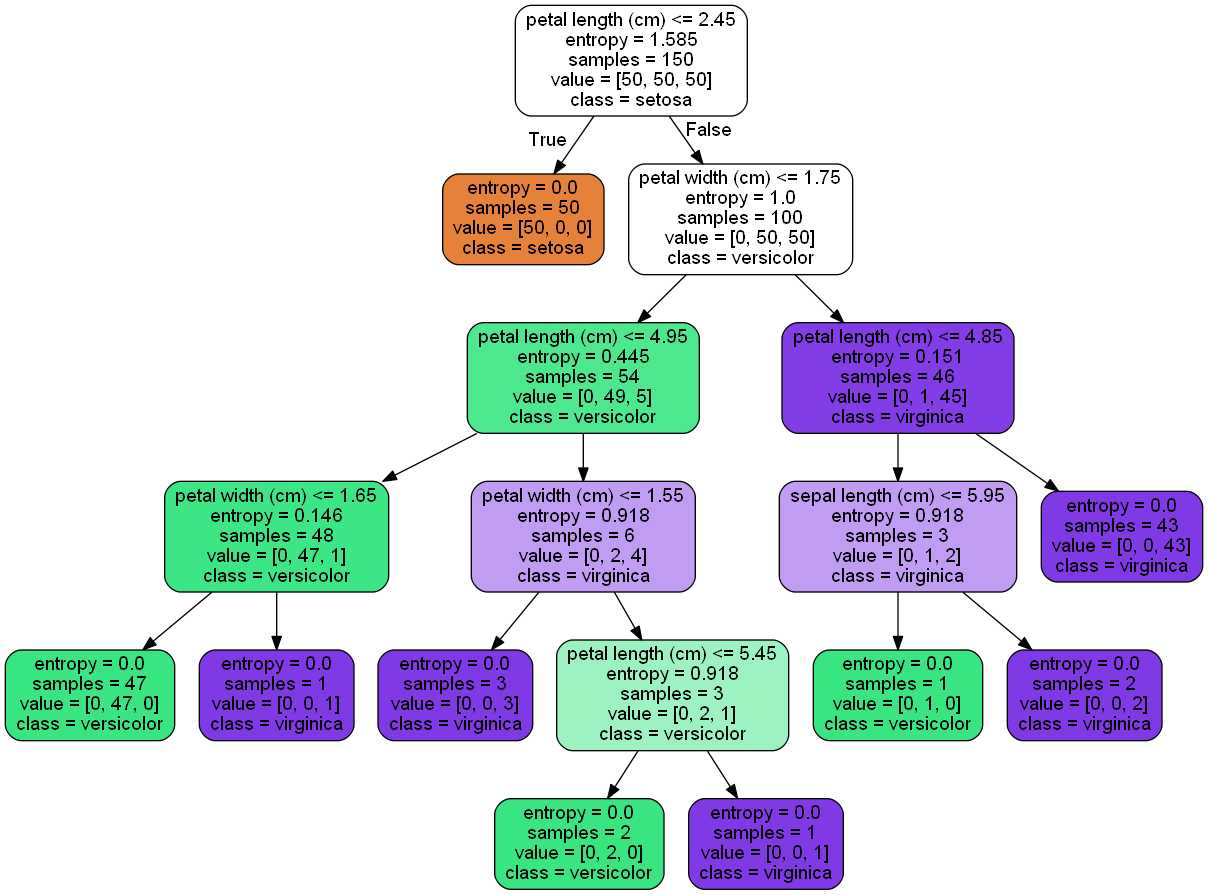

In [130]:
dot_data = StringIO() 
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True,
                feature_names=iris.feature_names,class_names=iris.target_names) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [ ]:
Level 0
Count of setosa =  50
Count of virginica =  50
Count of versicolor =  50
Current Entropy is =  1.584962500721156
Splitting on feature pw_labelled with gain ratio  0.699638203622209
Class Name =  versicolor

Level  1
Count of virginica = 34
Current Entropy is = 0.0
Reached Leaf Node
Class Name = virginica

Level  1
Count of setosa = 50
Current Entropy is = 0.0
Reached Leaf Node
Class Name = setosa

Level 1
Count of virginica =  16
Count of versicolor =  40
Current Entropy is =  0.863120568566631
Splitting on feature pl_labelled with gain ratio  0.4334099495621066
Class Name =  versicolor

Level  2
Count of virginica = 8
Current Entropy is = 0.0
Reached Leaf Node
Class Name = virginica

Level 2
Count of virginica =  8
Count of versicolor =  39
Current Entropy is =  0.6581912658132185
Splitting on feature sl_labelled with gain ratio  0.12674503775809332
Class Name =  versicolor

Level  3
Count of virginica = 1
Current Entropy is = 0.0
Reached Leaf Node
Class Name = virginica

Level 3
Count of virginica =  7
Count of versicolor =  23
Current Entropy is =  0.783776947484701
Splitting on feature sw_labelled with gain ratio  0.07092036405148876
Class Name =  versicolor

Level 4
Count of virginica = 1
Count of versicolor = 3
Current Entropy is = 0.8112781244591328
Reached Leaf Node
Class Name =  virginica

Level  4
Count of versicolor = 6
Current Entropy is = 0.0
Reached Leaf Node
Class Name = versicolor

Level 4
Count of virginica = 6
Count of versicolor = 14
Current Entropy is = 0.8812908992306927
Reached Leaf Node
Class Name =  virginica

Level  3
Count of versicolor = 14
Current Entropy is = 0.0
Reached Leaf Node
Class Name = versicolor

Level  3
Count of versicolor = 2
Current Entropy is = 0.0
Reached Leaf Node
Class Name = versicolor

Level  2
Count of versicolor = 1
Current Entropy is = 0.0
Reached Leaf Node
Class Name = versicolor

Level  1
Count of versicolor = 10
Current Entropy is = 0.0
Reached Leaf Node
Class Name = versicolor